# Recommendation Engine Cleaning & EDA

Anaysis by Brendan Bullivant & Frank Flavell

## Business Case

Before Disney launched Disney Plus, its long awaited streaming service to rival Netflix and Amazon Prime Video, it built anticipation by promoting popular films from Star Wars, Marvel, and Pixar that would become easily accessible through the platform.  But when it launched, it was clear that Disney's strategy was quality over quantity and the surprising lack breadth couldn't fully satisfy users' desire to binge, an industry expectation set by Netflix.

To compete with Netflix, Disney Plus has hired us, a media analytics firm, to develop a recommendation system to guide users from the popular blockbusters to the potentially popular content in the long tail of the media company's existing intellectual property.  This long tail includes older classics as well as more recent movies that are highly rated but not well known.

We set out to answer the following questions to help us develop this recommendation system.

* How many users and how many movies?
* How many ratings?
* How many ratings per movie?
* How many genres are represented?
* Giants: What are the most popular movies?
* Sleeping Giants: What are high rated movies with a relatively lower number of user reviews that could be more popular if promoted?


## Dataset

We will be using the latest update of the [MovieLens](https://grouplens.org/datasets/movielens/latest/) dataset provided by the GroupLens research lab at the University of Minnesota.  The data comes in 4 different .csv files:
* movies: the movie title/year (str), genres (str), and movie id (int).
* ratings: user id, movie id, rating, timestamp
* links: the movie id, the imdb id and the movie database id (useful for api calls to gather more information)
* tags: user id, movie id, string tags (descriptive words about the movie), timestamp


## Table of Contents<span id="0"></span>

1. [**Data Import & Cleaning**](#1)
    * Merged Dataframes into master df
    * Removed unnecessary column
    * Created a column for movie year
    * Removed Null Values
    <br/><br/>
2. [**Exploratory Data Analysis**](#2)
    * How many users and how many movies are in the dataset?
    * How many ratings?
    * What is the average number of ratings per user?
    * How many ratings per movie?
    * How many of each rating?
    * How many genres are there?
    * Giants: What are the most popular movies?
    * Sleeping Giants: What are high rated movies with a relatively lower number of user reviews that could be more popular if promoted?
    <br/><br/>
3. [**Findings**](#3)

# Package Import

In [4]:
# import external libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re #regex

# Configure matplotlib for jupyter.
%matplotlib inline

# <span id="1"></span>1. Data Import & Review
#### [Return Contents](#0)

We import the .csv files listed in the dataset summary above and review their contents.  We decided to merge the movies and the ratings together.  We do not need additional information to conduct our basic EDA, so we will wait to merge the links.csv until we do API calls for the content-based recommendation engine.

In [5]:
#Imports the dataframes
links = pd.read_csv("ml-latest-small/links.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


We merged ratings and movies dataframes together into a master df.

In [10]:
df = pd.merge(ratings, movies, on="movieId")

In [11]:
df.head(150)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
145,412,1,2.0,939114353,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
146,414,1,4.0,961438127,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
147,420,1,4.0,1218207191,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
148,422,1,4.0,986173307,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Cleaning

We cleaned the master df.
* We removed an unnecessary column: 'timestamp'
* we iterated through the title column using a regex statement to extract the movie year and transfer it to a new column, 'year'
* We identified approximately 38 null values and removed them from the dataframe.

### Remove Timestamp Column

In [12]:
df.drop(['timestamp'], axis=1, inplace=True)

In [13]:
df.shape

(100836, 5)

### Extract Movie Year from Title Column and Create New Column

In [14]:
import re
df['year'] = df['title'].str.extract(r'\((.+)\)')

In [15]:
df

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,1997
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,2005
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,2016


In [16]:
#df['title'] = df['title'].str.replace(r'\((.+)\)', "")

In [17]:
#df.head()

### Identify and Remove Null Values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId     100836 non-null int64
movieId    100836 non-null int64
rating     100836 non-null float64
title      100836 non-null object
genres     100836 non-null object
year       100819 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 5.4+ MB


In [19]:
df[df['year'].isnull() == True]

,userId,movieId,rating,title,genres,year
81507,62,176601,5.0,Black Mirror,(no genres listed),NaN
88645,105,147250,5.0,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
89491,111,171631,1.0,Maria Bamford: Old Baby,(no genres listed),NaN
89494,111,171891,3.5,Generation Iron 2,(no genres listed),NaN
93457,209,140956,3.5,Ready Player One,Action|Sci-Fi|Thriller,NaN
93458,305,140956,4.5,Ready Player One,Action|Sci-Fi|Thriller,NaN
93459,380,140956,3.0,Ready Player One,Action|Sci-Fi|Thriller,NaN
93460,514,140956,3.0,Ready Player One,Action|Sci-Fi|Thriller,NaN
93476,210,40697,4.0,Babylon 5,Sci-Fi,NaN
93477,528,40697,0.5,Babylon 5,Sci-Fi,NaN


In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100819 entries, 0 to 100835
Data columns (total 6 columns):
userId     100819 non-null int64
movieId    100819 non-null int64
rating     100819 non-null float64
title      100819 non-null object
genres     100819 non-null object
year       100819 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 5.4+ MB


In [22]:
df.groupby('genres').count().head(100) #get the count of each category

,userId,movieId,rating,title,year
genres,,,,,
(no genres listed),38,38,38,38,38
Action,186,186,186,186,186
Action|Adventure,555,555,555,555,555
Action|Adventure|Animation,42,42,42,42,42
Action|Adventure|Animation|Children,39,39,39,39,39
...,...,...,...,...,...
Action|Adventure|Drama|Romance,8,8,8,8,8
Action|Adventure|Drama|Romance|Thriller,1,1,1,1,1
Action|Adventure|Drama|Romance|Thriller|Western,1,1,1,1,1


In [23]:
df = df[df.genres!= '(no genres listed)']

Export dataframe to pickle for future reference.

In [24]:
df.to_pickle("cleaned.pickle")

# <span id="2"></span>2. Exploratory Data Analysis
#### [Return Contents](#0)

In EDA, we set out to answer the following questions to help us better understand the data as well as a few insights that will help us recommend potentially popular movies.

* How many users and how many movies are in the dataset?
* How many ratings?
* What is the average number of ratings per user?
* How many ratings per movie?
* How many of each rating?
* How many genres are there?
* Giants: What are the most popular movies?
* Sleeping Giants: What are high rated movies with a relatively lower number of user reviews that could be more popular if promoted?

Import pickle of cleaned dataset.

In [98]:
df = pd.read_pickle('cleaned.pickle')

In [99]:
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


## How many users and how many movies are in the dataset?

There are 610 unique users and a total of 9,686 movies that those users reviewed.

In [100]:
num_users = df['userId'].nunique()
num_users

610

In [101]:
num_movies = df['movieId'].nunique()
num_movies

9686

## How many ratings?

There's a total of 100,781 user reviews.

In [102]:
num_ratings = df['rating'].count()
num_ratings

100781

In [103]:
df.shape

(100781, 6)

## What is the average number of ratings per user?

The average number of ratings per user is 165.

In [104]:
avg_ratings_user = round((num_ratings/num_users),2)
avg_ratings_user

165.21

## How many ratings per movie?

Movies have an average of 10 ratings, but there are some significant outliers with more than 200 ratings.  These extremely popular outliers could potentially impact our recommendations so we will determine how to subset our data to isolate the most important movies.

In [166]:
num_rating = df.groupby('movieId')['rating'].count().reset_index().sort_values('rating', ascending=False)

In [167]:
num_rating

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
...,...,...
1316,1771,1
6001,38159,1
6002,38164,1
6003,38198,1


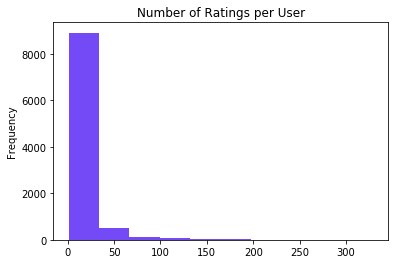

In [267]:
pal = sns.color_palette(("#7449f6", "#ee823e"))
sns.set_palette(pal)
p = num_rating['rating'].plot(x='Amount of Ratings', y='Number of Users', kind = 'hist', title = 'Number of Ratings per User')
#p.xlim([0, 300])
# p.xlabel('Amount of Ratings')
# p.ylabel('Number of Users')

## How many of each rating category (0.5-5)?

There are actually 10 rating categories in this dataset, including the .5 mark, as opposed to the standard 1 to 5.  We wanted to see how the ratings are distributed amoung the 10 categories.

In [260]:
ratings_grouped = df.groupby('rating')['userId'].count()
ratings_grouped

rating
0.5     1367
1.0     2809
1.5     1791
2.0     7549
2.5     5544
3.0    20038
3.5    13129
4.0    26809
4.5     8542
5.0    13203
Name: userId, dtype: int64

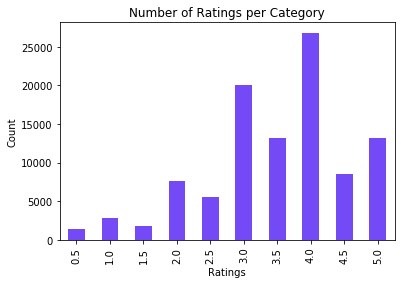

In [261]:
pal = sns.color_palette(("#7449f6", "#ee823e"))
sns.set_palette(pal)
p = ratings_grouped.plot(kind = 'bar', stacked = False, title = 'Number of Ratings per Category',)
p.set_xlabel('Ratings')
p.set_ylabel('Count')
plt.show()

## Which rating categories have the highest number of ratings?

59.5% of the ratings are concentrated between 3-4.

In [16]:
threefour = ratings_grouped.iloc[5:8].sum()
threefour

59976

In [18]:
round(threefour/num_ratings, 3)

0.595

## How many genres are there?

There are 18 base genres and 932 unique combinations of the base genres.  For example, Action|Thriller|Comedy would be considered a unique combination of genres.  Becauase there are so many unique genres, we don't think this will be incredibly useful to make recommendations for such a relatively small dataset.  However, genres could be used to filter out erroneous recommendations right before presenting them to a user.

In [172]:
genres = df.groupby('genres') #get the count of each category

In [173]:
genres.count()

,userId,movieId,rating,title,year
genres,,,,,
Action,186,186,186,186,186
Action|Adventure,555,555,555,555,555
Action|Adventure|Animation,42,42,42,42,42
Action|Adventure|Animation|Children,39,39,39,39,39
Action|Adventure|Animation|Children|Comedy,178,178,178,178,178
...,...,...,...,...,...
Sci-Fi|Thriller,116,116,116,116,116
Sci-Fi|Thriller|IMAX,12,12,12,12,12
Thriller,628,628,628,628,628


In [174]:
list(genres['genres'])

[('Action', 18826     Action
  29524     Action
  29525     Action
  29526     Action
  29527     Action
             ...  
  100687    Action
  100732    Action
  100812    Action
  100819    Action
  100825    Action
  Name: genres, Length: 186, dtype: object),
 ('Action|Adventure', 5951      Action|Adventure
  5952      Action|Adventure
  5953      Action|Adventure
  5954      Action|Adventure
  5955      Action|Adventure
                  ...       
  97568     Action|Adventure
  97569     Action|Adventure
  99624     Action|Adventure
  100802    Action|Adventure
  100826    Action|Adventure
  Name: genres, Length: 555, dtype: object),
 ('Action|Adventure|Animation', 68216     Action|Adventure|Animation
  68217     Action|Adventure|Animation
  68615     Action|Adventure|Animation
  68616     Action|Adventure|Animation
  68617     Action|Adventure|Animation
  68618     Action|Adventure|Animation
  68619     Action|Adventure|Animation
  68620     Action|Adventure|Animation
  68621   

In [197]:
base_genres = []
all_genres = list(genres['genres'])
for x in all_genres:
    if '|' not in x[0]:
        base_genres.append(x)

In [216]:
base_genres_unique = []
for item in base_genres:
    base_genres_unique.append(item[0])
base_genres_unique

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [217]:
len(base_genres_unique)

18

## What are the Giants?

Giants are movies with an average rating of 3.5 and above and with more than 75 user ratings.  There are 177 Giants in a dataset of almost 10,000 movies.

Idenitfy the average rating for each movie.

In [219]:
movie_avg_rating = df.groupby('movieId')['rating'].mean()
movie_avg_rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9686, dtype: float64

In [220]:
avg_above_3 = movie_avg_rating[movie_avg_rating >= 3.5]
avg_above_3

movieId
1         3.920930
6         3.946078
11        3.671429
14        3.833333
16        3.926829
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 4659, dtype: float64

In [221]:
#the groupby object to count the number of ratings per movie.
df_grp = df.groupby('movieId')['rating'].count().reset_index().sort_values('rating', ascending=False)

In [223]:
#filters the groupby object to only inlcude movies that have between 10 to 50 ratings.a
above75 = df_grp[(df_grp['rating'] > 75)]

In [234]:
giants = above75[above75['movieId'].isin(avg_above_3.index)]

In [270]:
giants

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
...,...,...
2027,2700,76
7025,69122,76
4328,6333,76
7749,91529,76


In [253]:
giants_ids = list(giants['movieId'])

In [254]:
with open('giants_ids.pickle', 'wb') as f:
    pickle.dump(giants_ids, f)

## What are the Sleeping Giants?

Sleeping Giants are movies with an average rating of 3.5 or above and between 10 to 50 user ratings.  This leaves us with almost 1,000 movies out of the 10,000 that we can promote in addition to the 177 Giants.

Identify the average rating for each movie.

In [225]:
movie_avg_rating = df.groupby('movieId')['rating'].mean()

In [226]:
movie_avg_rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9686, dtype: float64

In [268]:
avg_above_3 = movie_avg_rating[movie_avg_rating >= 3.5]

In [269]:
avg_above_3

movieId
1         3.920930
6         3.946078
11        3.671429
14        3.833333
16        3.926829
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 4659, dtype: float64

Identify movies with between 10 to 50 ratings.

In [229]:
#the groupby object to count the number of ratings per movie.
df_grp = df.groupby('movieId')['rating'].count().reset_index().sort_values('rating', ascending=False)

In [230]:
#filters the groupby object to only inlcude movies that have between 10 to 50 ratings.
ten_fifty = df_grp[(df_grp['rating'] >= 10) & (df_grp['rating'] <= 75)]

In [231]:
ten_fifty

,movieId,rating
2019,2692,75
5259,8665,75
4170,6016,75
2391,3175,75
1474,2000,75
...,...,...
2098,2793,10
2085,2772,10
1406,1927,10
5753,31221,10


Filter the groupby with number of ratings between 10 to 50 using the groupby for average ratings of 4 and above.

In [232]:
sl_giants = ten_fifty[ten_fifty['movieId'].isin(avg_above_3.index)]

In [246]:
sl_giants_ids = list(sl_giants['movieId'])

In [250]:
import pickle

In [251]:
with open('sl_giants_ids.pickle', 'wb') as f:
    pickle.dump(sl_giants_ids, f)

#sl_giants_ids.to_pickle('sl_giants_ids.pickle')

In [ ]:
sl_giants

In [240]:
df_sl_giants = df[df['movieId'].isin(sl_giants['movieId'])]

In [241]:
df_sl_giants

,userId,movieId,rating,title,genres,year
776,1,70,3.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
777,18,70,3.5,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
778,19,70,2.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
779,34,70,3.5,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
780,45,70,4.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
...,...,...,...,...,...,...
95388,405,3676,5.0,Eraserhead (1977),Drama|Horror,1977
95389,462,3676,3.5,Eraserhead (1977),Drama|Horror,1977
95390,567,3676,5.0,Eraserhead (1977),Drama|Horror,1977
95391,580,3676,2.5,Eraserhead (1977),Drama|Horror,1977


# <span id="3"></span>3. Findings
#### [Return Contents](#0)

We have determined our most popular movies as well as our Sleeping Giants which could be more popular if promoted to users.  Now we can use these subsets along with a recommendation system that can help Disney Plus meet the industry expectation of a higher quantity of long tail content.

The next steps are to determine which recommendation system will be best to solve this problem.  We are going to try SVD and SVDpp to compare user to user similarity in regards to their movie ratings as well as a content-based system that can compare the similarity between movies regardless of their ratings.